In [1]:
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import datetime as dt
import time
import json
from pyspark.sql import SQLContext
import json
from IPython import display
from IPython.core.display import HTML
import pandas
import time 
import numpy as np
import matplotlib.pyplot as plt 
from pyspark.sql.functions import split, explode, col

sql = SQLContext(sc)

#  KEEP SYDNEY OPEN: 8 OCTOBER 2016
# Event Description:

About 4,000 people have turned out in central Sydney to protest against the New South Wales Government's controversial lockout laws. Aussie rocker Jimmy Barnes threw his support behind the rally, releasing a video message in which he said the lockout laws were not working. The Cold Chisel frontman said he made a career playing in live venues in Sydney, but that attendance at live music venues had dropped 40 per cent since the lockout laws were introduced. The rally heard calls for the 1:30am lockout to be lifted, and for the 10:00pm takeaway cut-off to be reverted to midnight. 

The popular hashtags  for the event were : #keepsydneyopen #KeepSydneyOpen #Nolockouts #nightlivesmatter #keepsydneyopenrally #keepsydneylate

# Get one Week Tweet Before the Event....

In [2]:
lol = sql.read.load(format = "au.com.d2dcrc.carbon.spark.tweets", startTime = "2016-10-10T00:11:00Z", endTime = "2016-10-10T00:12:00Z")
lol.printSchema()
displaytweets = lol.select( "author", "publicationTime", "bodyText", "locations")

root
 |-- key:salt: byte (nullable = true)
 |-- key:timestamp: timestamp (nullable = true)
 |-- key:id: string (nullable = true)
 |-- key:subIds: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- data: string (nullable = true)
 |-- reference: string (nullable = true)
 |-- format: string (nullable = true)
 |-- type: string (nullable = true)
 |-- source: string (nullable = true)
 |-- ingestTime: timestamp (nullable = true)
 |-- author: string (nullable = true)
 |-- civilEvents: string (nullable = true)
 |-- locations: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- nlp: string (nullable = true)
 |-- publicationTime: timestamp (nullable = true)
 |-- politicalParty: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- times: string (nullable = true)
 |-- bodyText: string (nullable = true)
 |-- title: string (nullable = true)
 |-- phraseList: string (nullable = true)



In [35]:
x = only_time.select("publicationTime").flatMap(list).collect()

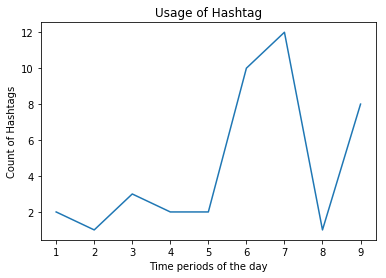

In [49]:
mycount = [2,1,3,2,2,10,12,1,8]
y= [1,2,3,4,5,6,7,8,9]

mycount = np.array(mycount)
x = np.array(x)

plt.plot(y, mycount)
plt.title('Usage of Hashtag')
plt.xlabel('Time periods of the day')
plt.ylabel('Count of Hashtags')
#plt.scatter(days, counthash)

plt.show()


In [41]:
type(x)
type(mycount)

list

In [9]:
mynew = displaytweets.toPandas()

In [11]:
type(mynew)
mynew.describe

<bound method NDFrame.describe of                                  author     publicationTime  \
0               id:twitter.com:52776866 2016-10-10 10:41:00   
1     id:twitter.com:742652113386274817 2016-10-10 10:41:00   
2             id:twitter.com:1276192123 2016-10-10 10:41:01   
3              id:twitter.com:499751665 2016-10-10 10:41:03   
4             id:twitter.com:1973721288 2016-10-10 10:41:03   
5             id:twitter.com:2489646169 2016-10-10 10:41:04   
6              id:twitter.com:132868827 2016-10-10 10:41:05   
7     id:twitter.com:762861090241810432 2016-10-10 10:41:05   
8               id:twitter.com:86848460 2016-10-10 10:41:06   
9               id:twitter.com:41378267 2016-10-10 10:41:07   
10             id:twitter.com:304039080 2016-10-10 10:41:07   
11             id:twitter.com:226857183 2016-10-10 10:41:08   
12            id:twitter.com:1522410841 2016-10-10 10:41:08   
13             id:twitter.com:127393602 2016-10-10 10:41:09   
14             id:twi

In [12]:
hashTags = mynew.where(mynew['bodyText'].str.contains('#')).dropna()

In [15]:
hashTags

,author,publicationTime,bodyText,locations
9,id:twitter.com:41378267,2016-10-10 10:41:07,RT @PSyvret: That Trump stunt was beyond surre...,
15,id:twitter.com:222644440,2016-10-10 10:41:09,RT @RealAlexJones: Insider: Hillary To Refuse ...,
16,id:twitter.com:83091858,2016-10-10 10:41:10,@GENTLEMANMick @ABarrMLA where #greyhound raci...,
20,id:twitter.com:3094811792,2016-10-10 10:41:12,Managing #conflict - 10 things you may not exp...,
22,id:twitter.com:2856369403,2016-10-10 10:41:13,RT @RealTimFerguson: @SenPaterson is the New W...,
23,id:twitter.com:293538857,2016-10-10 10:41:14,RT @ABCmediawatch: Beyond satire: News falls f...,Australia/NSW/Sydney
25,id:twitter.com:34017742,2016-10-10 10:41:14,#Alibaba 's #Hollywood partnership https://t.c...,
29,id:twitter.com:1887234522,2016-10-10 10:41:16,I hope Nick Patrick is the ref for the triple ...,
30,id:twitter.com:21051246,2016-10-10 10:41:17,RT @purplegwemlin: @NCInews I'll be talking ab...,
34,id:twitter.com:726958925086515201,2016-10-10 10:41:22,Triple threat on the way #WWENoMercy #AJStyles...,


In [32]:
only_time = lol("publicationTime")
only_time.show()

TypeError: 'DataFrame' object is not callable

In [ ]:
x = only_time.select("publicationTime").flatMap(list).collect()
#print(x)


In [8]:
displaytweets.describe
type(displaytweets)

pyspark.sql.dataframe.DataFrame

In [ ]:
#realtweet = lol.select( 'publicationTime', 'bodyText') 
#sqlContext.registerDataFrameAsTable(lol, "table1")
#daily = sqlContext.sql("SELECT bodyText, publicationTime FROM table5 WHERE bodyText LIKE '%#keepsydneyopen%' ")
#myretweet.count
#hashTags = displaytweets.where(displaytweets['bodyText'].str.contains('#')).dropna()


In [ ]:
daily.show()

In [ ]:
sqlContext.registerDataFrameAsTable(daily, "table6")
#daily = sqlContext.sql("SELECT bodyText, publicationTime FROM table5 WHERE bodyText LIKE '%#keepsydneyopen%' ")
sqlContext.sql("SELECT publicationTime FROM table6 ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-01%' ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-02%' ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-03%' ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-04%' ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-05%' ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-06%' ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-07%' ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-08%' ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-09%' ").count()

In [ ]:
sqlContext.sql("SELECT publicationTime FROM table6 WHERE publicationTime LIKE '%2016-10-10%' ").count()

In [ ]:
myList = [2,1,3,2,2,10,12,1]

# Futher Analysis:

In [ ]:
myList = [ ]

# Hashtags and Locations
